In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
output_data_file = "Resources/student-merge.csv"
por_path = "Resources/student-por.csv"
math_path = "Resources/student-mat.csv"

por_df = pd.read_csv(por_path)
math_df = pd.read_csv(math_path)

In [23]:
students_df = pd.merge(por_df, math_df, on=["school","sex","age","address","famsize",
                                            "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                                            "guardian", "traveltime","nursery","higher",
                                            "internet","romantic","famrel","freetime",
                                            "goout","Dalc","Walc","health"])
students_df.columns = students_df.columns.str.replace("_x","_por")
students_df.columns = students_df.columns.str.replace("_y","_math")
students_df.to_csv(output_data_file)
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,absences_math,G1_math,G2_math,G3_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2,0,yes,no,no,no,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,0,no,yes,no,no,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,yes,no,yes,no,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,0,no,yes,yes,yes,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,0,no,yes,yes,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,...,3,1,no,no,no,yes,0,7,5,0
366,MS,F,18,U,LE3,T,3,1,teacher,services,...,2,0,no,yes,yes,no,0,7,9,8
367,MS,F,18,U,GT3,T,1,1,other,other,...,2,1,no,no,no,yes,0,6,5,0
368,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,no,no,no,no,3,14,16,16


F    195
M    175
Name: sex, dtype: int64


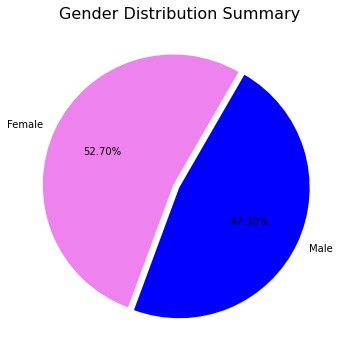

In [24]:
# Generate a pie plot showing the distribution of female versus male  using Pandas
# Do boys tend to consume alcohol or girls?
gender_count=students_df["sex"].value_counts()
print(gender_count)
colour_plot=["violet","blue"]
explode_plot=(0.05,0)
plt.pie(gender_count,labels=['Female','Male'],autopct='%0.2f%%',colors=colour_plot,explode=explode_plot,startangle=60)
plt.title("Gender Distribution Summary",fontsize=16)
plt.show()


In [25]:
age_count=students_df["age"].value_counts()

student_age=students_df["age"].unique()

In [26]:
student_age_mean=students_df["age"].mean()
student_age_median=students_df["age"].median()

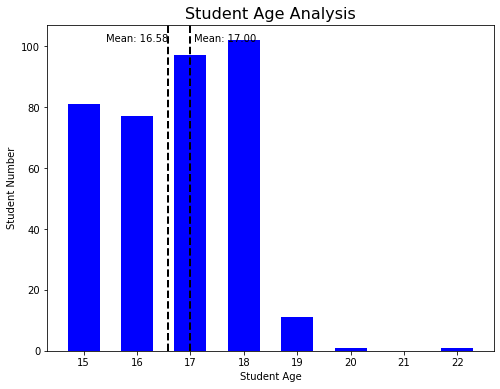

In [27]:

fig=plt.bar(student_age,age_count,color='b',align="center", width= 0.6)
plt.title("Student Age Analysis",fontsize=16)
plt.xlabel("Student Age")
plt.ylabel("Student Number")
plt.rcParams['figure.figsize'] = [8, 6]
plt.axvline(student_age_mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(student_age_median, color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(student_age_mean*0.93, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_mean))

plt.text(student_age_mean*1.03, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_median))
plt.show()

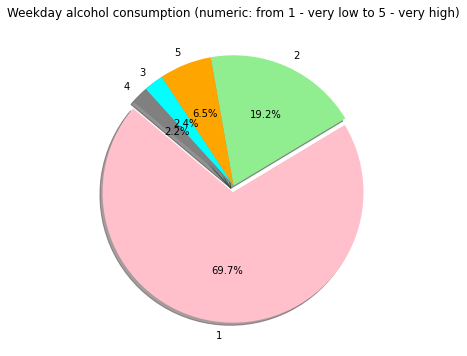

In [28]:
labels = students_df["Dalc"].unique()
amount = students_df["Dalc"].value_counts()

colours = ["pink","lightgreen","orange","cyan","gray"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()





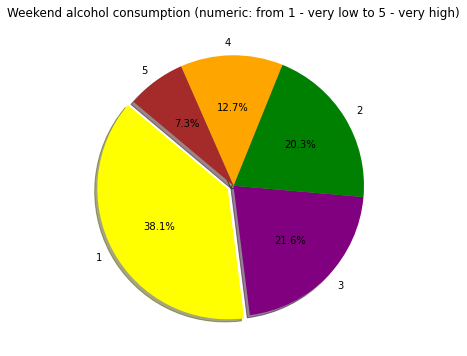

In [29]:
labels = students_df["Walc"].unique()
amount = students_df["Walc"].value_counts()

colours = ["yellow","purple","green","orange","brown"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()



In [32]:
x1 = students_df.loc[students_df["paid_math"]=="yes","paid_math"].count()
x2 = students_df.loc[students_df["paid_por"]=="yes","paid_por"].count()
x3 = students_df.loc[students_df["paid_math"]=="no","paid_math"].count()
x4 = students_df.loc[students_df["paid_por"]=="no","paid_por"].count()


174

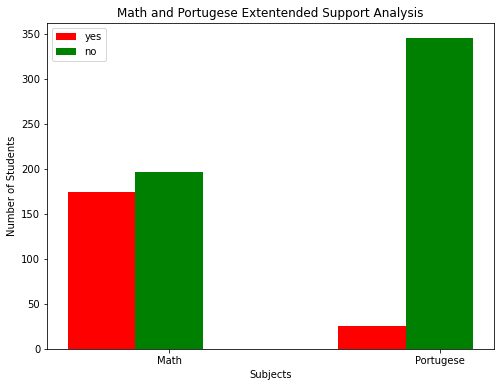

In [40]:


N = 2
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, [x1,x2], width, color = 'r', label= 'yes')
  

bar2 = plt.bar(ind+width, [x3,x4], width, color='g', label='no')
  

  
plt.xlabel("Subjects")
plt.ylabel('Number of Students')
plt.title("Math and Portugese Extentended Support Analysis")
  
plt.xticks(ind+width,['Math', 'Portugese'])
plt.legend( (bar1, bar2), ('yes', 'no') )
plt.show()